In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew
from pathlib import Path

In [3]:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)
DATA_PATH = Path("../data/nyc_311_2022_to_2025_sample_150k.csv")

In [4]:
df = pd.read_csv(DATA_PATH, low_memory=False)
print(f" Loaded shape: {df.shape}")


print("Earliest:", df['created_date'].min())
print("Latest:", df['created_date'].max())



 Loaded shape: (404742, 41)
Earliest: 2022-01-01T00:00:00.000
Latest: 2022-02-14T15:11:22.000


In [5]:
display(df.head())
display(df.info())
display(df.describe())

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,facility_type,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,location_type,intersection_street_1,intersection_street_2,landmark,bridge_highway_name,bridge_highway_segment,taxi_pick_up_location,bridge_highway_direction,taxi_company_borough,road_ramp,due_date,vehicle_type
0,52940375,2022-01-01T00:00:00.000,2022-01-03T08:39:00.000,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",10036.0,640 8 AVENUE,8 AVENUE,W 41 ST,W 42 ST,ADDRESS,NEW YORK,NaN,Closed,The Department of Environmental Protection det...,2022-01-03T08:39:00.000,05 MANHATTAN,1.010138e+09,MANHATTAN,986967.0,214950.0,ONLINE,Unspecified,MANHATTAN,40.756664,-73.990193,"{'latitude': '40.75666417742652', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52934953,2022-01-01T00:00:10.000,2022-01-01T01:00:11.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,11222.0,126 DRIGGS AVENUE,DRIGGS AVENUE,NORTH HENRY STREET,RUSSELL STREET,ADDRESS,BROOKLYN,NaN,Closed,The Police Department responded to the complai...,2022-01-01T01:00:15.000,01 BROOKLYN,NaN,BROOKLYN,999866.0,202742.0,MOBILE,Unspecified,BROOKLYN,40.723143,-73.943662,"{'latitude': '40.72314288436064', 'longitude':...",Street/Sidewalk,NORTH HENRY STREET,RUSSELL STREET,DRIGGS AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52933158,2022-01-01T00:00:57.000,2022-01-01T00:58:22.000,NYPD,New York City Police Department,Noise - Residential,Loud Talking,11214.0,45 BAY 38 STREET,BAY 38 STREET,86 STREET,BENSON AVENUE,ADDRESS,BROOKLYN,NaN,Closed,The Police Department responded to the complai...,2022-01-01T00:58:29.000,11 BROOKLYN,3.068668e+09,BROOKLYN,987344.0,156952.0,MOBILE,Unspecified,BROOKLYN,40.597473,-73.988859,"{'latitude': '40.59747269272421', 'longitude':...",Residential Building/House,86 STREET,BENSON AVENUE,BAY 38 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52938624,2022-01-01T00:01:04.000,2022-01-01T00:18:49.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,10025.0,998 AMSTERDAM AVENUE,AMSTERDAM AVENUE,WEST 109 STREET,CATHEDRAL PARKWAY,ADDRESS,NEW YORK,NaN,Closed,The Police Department responded to the complai...,2022-01-01T00:18:55.000,07 MANHATTAN,1.018810e+09,MANHATTAN,994168.0,231674.0,MOBILE,Unspecified,MANHATTAN,40.802562,-73.964176,"{'latitude': '40.80256198626038', 'longitude':...",Street/Sidewalk,WEST 109 STREET,CATHEDRAL PARKWAY,AMSTERDAM AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52931678,2022-01-01T00:01:17.000,2022-01-01T02:55:16.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10456.0,974 SHERIDAN AVENUE,SHERIDAN AVENUE,EAST 163 STREET,EAST 164 STREET,ADDRESS,BRONX,NaN,Closed,The Police Department responded to the complai...,2022-01-01T02:55:25.000,04 BRONX,2.024550e+09,BRONX,1006601.0,241609.0,ONLINE,Unspecified,BRONX,40.829808,-73.919235,"{'latitude': '40.82980806226658', 'longitude':...",Residential Building/House,EAST 163 STREET,EAST 164 STREET,SHERIDAN AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404742 entries, 0 to 404741
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   unique_key                      404742 non-null  int64  
 1   created_date                    404742 non-null  object 
 2   closed_date                     402260 non-null  object 
 3   agency                          404742 non-null  object 
 4   agency_name                     404742 non-null  object 
 5   complaint_type                  404742 non-null  object 
 6   descriptor                      395542 non-null  object 
 7   incident_zip                    398769 non-null  float64
 8   incident_address                384654 non-null  object 
 9   street_name                     384642 non-null  object 
 10  cross_street_1                  239887 non-null  object 
 11  cross_street_2                  239701 non-null  object 
 12  address_type    

None

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
count,4.047420e+05,398769.000000,3.635170e+05,3.991930e+05,399218.000000,399191.000000,399191.000000
mean,5.315550e+07,10796.454423,2.682732e+09,1.005762e+06,209366.609732,40.741286,-73.922331
std,1.405649e+05,591.418432,1.147678e+09,2.123056e+04,32728.905591,0.089835,0.076574
min,5.293153e+07,7753.000000,0.000000e+00,9.133900e+05,121204.000000,40.499093,-74.254818
25%,5.304585e+07,10452.000000,2.028050e+09,9.947080e+05,184390.000000,40.672725,-73.962283
50%,5.315328e+07,11104.000000,3.013480e+09,1.005272e+06,206885.000000,40.734458,-73.924106
75%,5.326239e+07,11230.000000,4.001340e+09,1.018475e+06,239840.000000,40.824950,-73.876377
max,6.007984e+07,99214.000000,5.270001e+09,1.067186e+06,271768.000000,40.912572,-73.700715


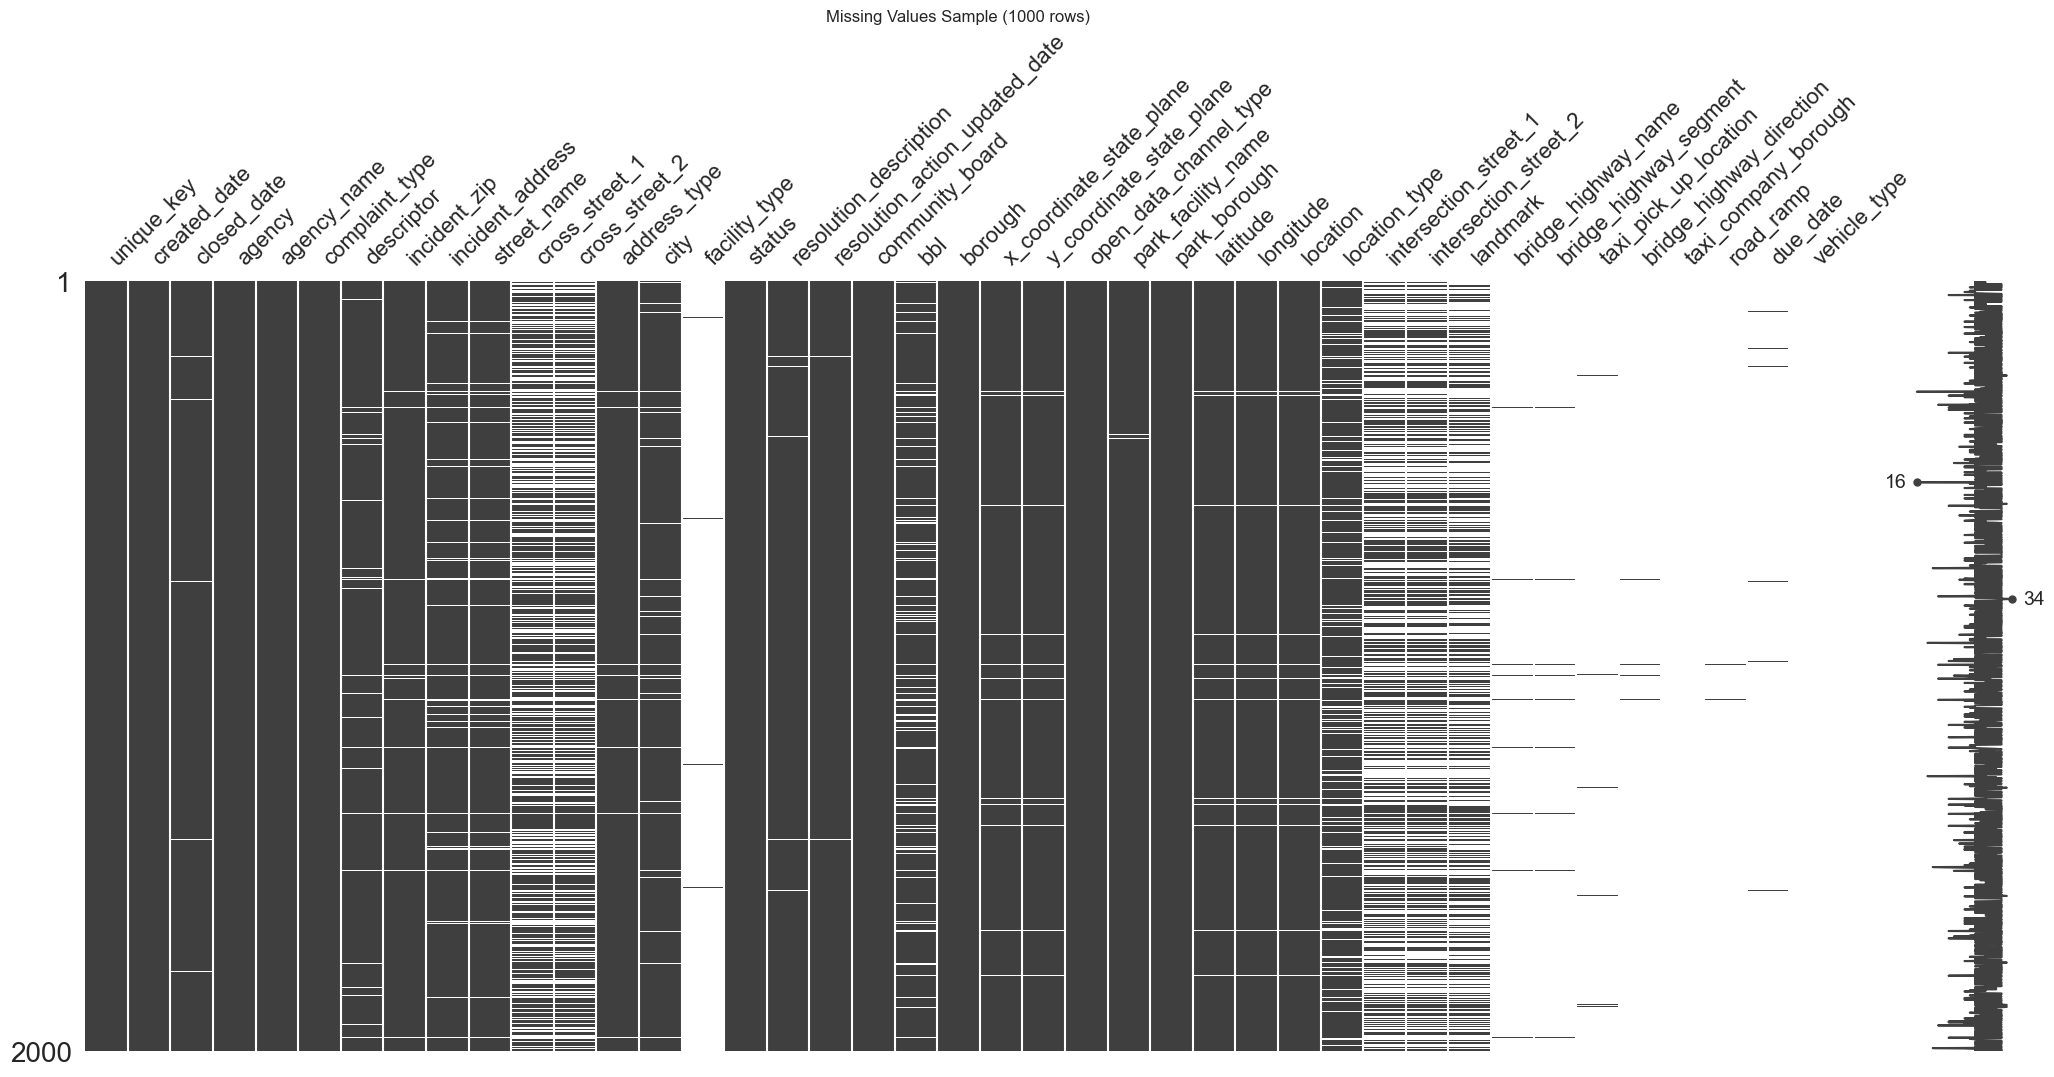

In [6]:
msno.matrix(df.sample(2000))
plt.title("Missing Values Sample (1000 rows)")
plt.show()

In [59]:
# Drop columns with more than 50% missing
from matplotlib import axis


threshold = 0.5
missing_ratio = df.isnull().mean()
to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
COLUMNS_TO_DROP = [
                "unique_key",
                "incident_address",
                "intersection_street_1",
                "intersection_street_2",
                "street_name",
                "cross_street_1",
                "cross_street_2",
                "landmark",
                "address_type",
                "x_coordinate_state_plane",
                "y_coordinate_state_plane",
                "bbl",
                "park_facility_name",
                "park_borough",
                "vehicle_type",
                "taxi_company_borough",
                "taxi_pick_up_location",
                "bridge_highway_name",
                "bridge_highway_direction",
                "road_ramp",
                "bridge_highway_segment",
                "open_data_channel_type",
                "due_date",
                "resolution_action_updated_date",
                "resolution_description",
                "community_board",
                "location",
                "city"
            ]
COLUMNS_TO_DROP.extend(to_drop)
print(COLUMNS_TO_DROP)
print(f"Dropping {len(to_drop)} columns: {to_drop}")

df_cleaned = df.drop(columns=COLUMNS_TO_DROP)


['unique_key', 'incident_address', 'intersection_street_1', 'intersection_street_2', 'street_name', 'cross_street_1', 'cross_street_2', 'landmark', 'address_type', 'x_coordinate_state_plane', 'y_coordinate_state_plane', 'bbl', 'park_facility_name', 'park_borough', 'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name', 'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment', 'open_data_channel_type', 'due_date', 'resolution_action_updated_date', 'resolution_description', 'community_board', 'location', 'city', 'facility_type', 'intersection_street_1', 'intersection_street_2', 'landmark', 'bridge_highway_name', 'bridge_highway_segment', 'taxi_pick_up_location', 'bridge_highway_direction', 'taxi_company_borough', 'road_ramp', 'due_date', 'vehicle_type']
Dropping 12 columns: ['facility_type', 'intersection_street_1', 'intersection_street_2', 'landmark', 'bridge_highway_name', 'bridge_highway_segment', 'taxi_pick_up_location', 'bridge_highway_direct

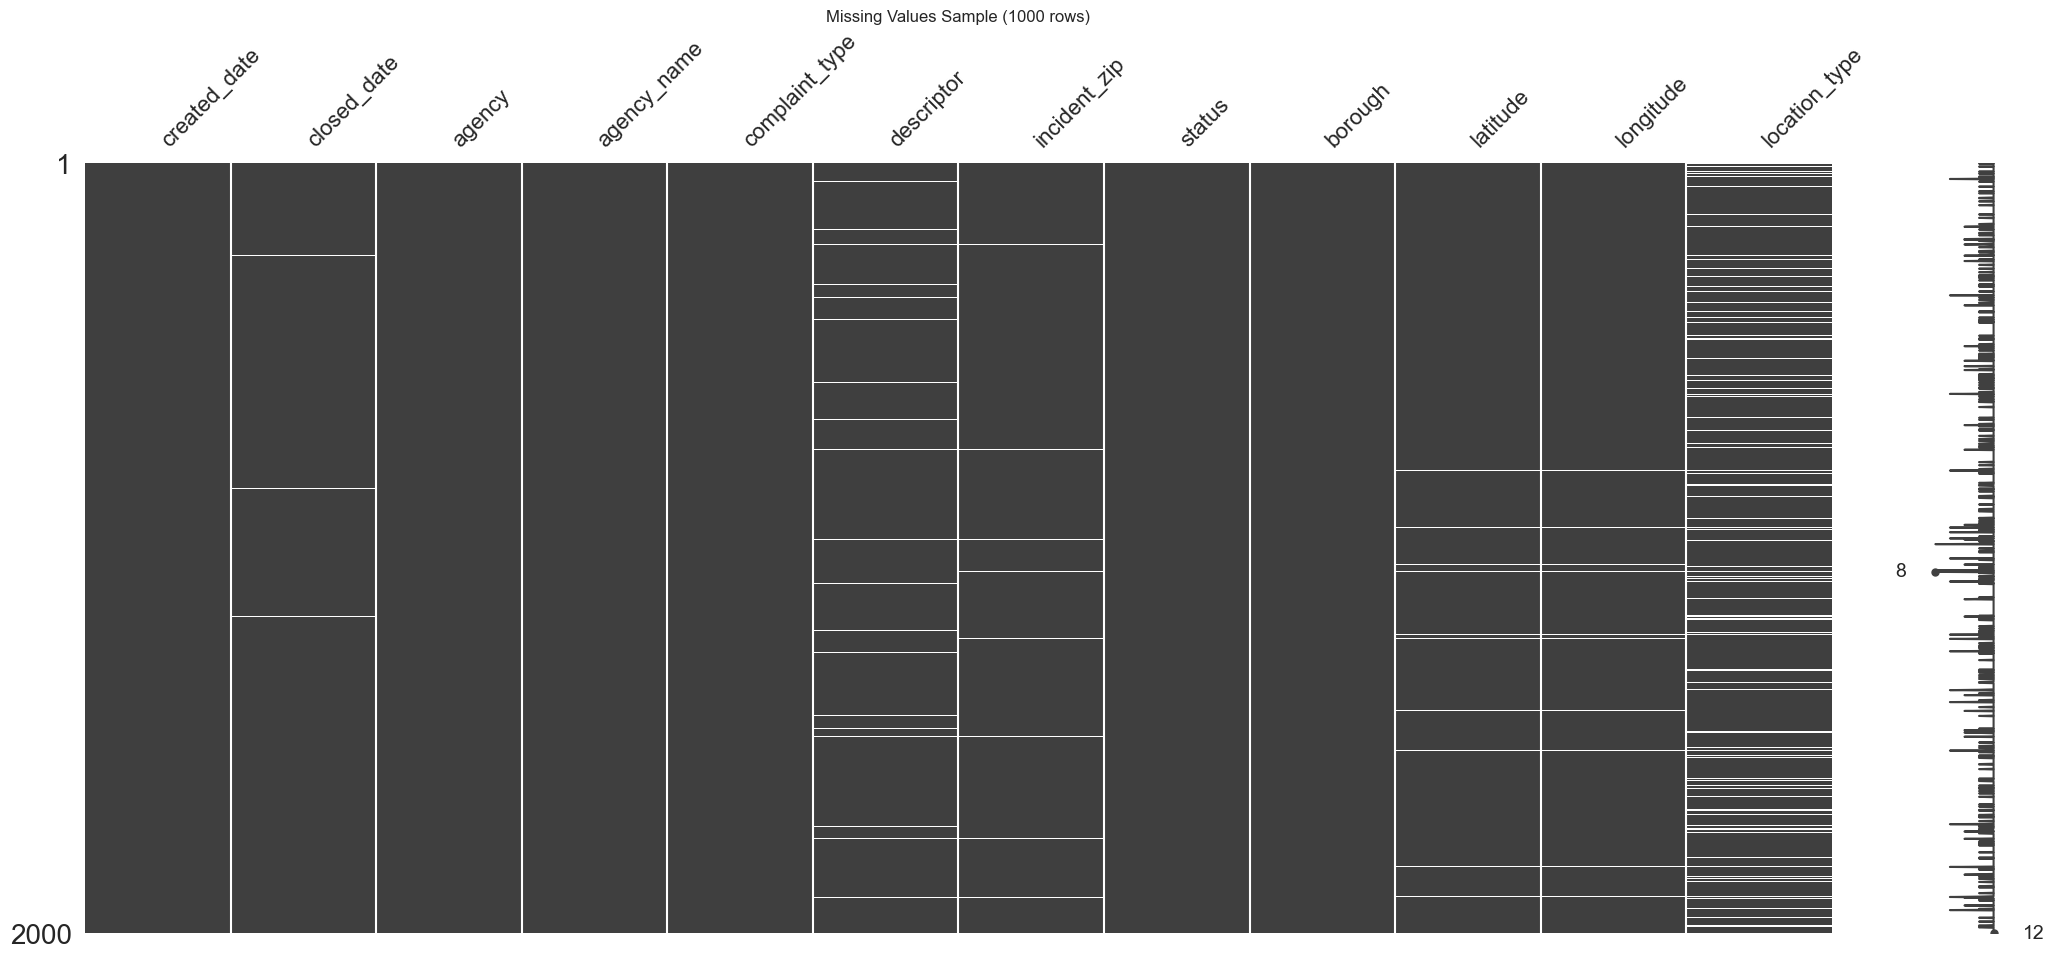

In [8]:
msno.matrix(df_cleaned.sample(2000))
plt.title("Missing Values Sample (1000 rows)")
plt.show()

In [9]:
df_cleaned["closed_date"].isna().sum()

np.int64(2482)

In [10]:
df[df["closed_date"].isna()]["complaint_type"].value_counts().head(10)
#


complaint_type
For Hire Vehicle Complaint             426
Taxi Complaint                         317
Street Condition                       254
Damaged Tree                           147
HEAT/HOT WATER                         105
Construction Lead Dust                  91
Overgrown Tree/Branches                 89
Private or Charter School Reopening     84
Rodent                                  80
Noise - Residential                     71
Name: count, dtype: int64

In [11]:
df[df["closed_date"].isna()]["agency"].value_counts().head(10)

agency
TLC      818
DPR      437
DOHMH    331
DOT      295
HPD      215
NYPD     116
DEP      110
OSE       84
DSNY      57
DHS       19
Name: count, dtype: int64

In [12]:
cleaned_df = df_cleaned.dropna(subset=["closed_date"])


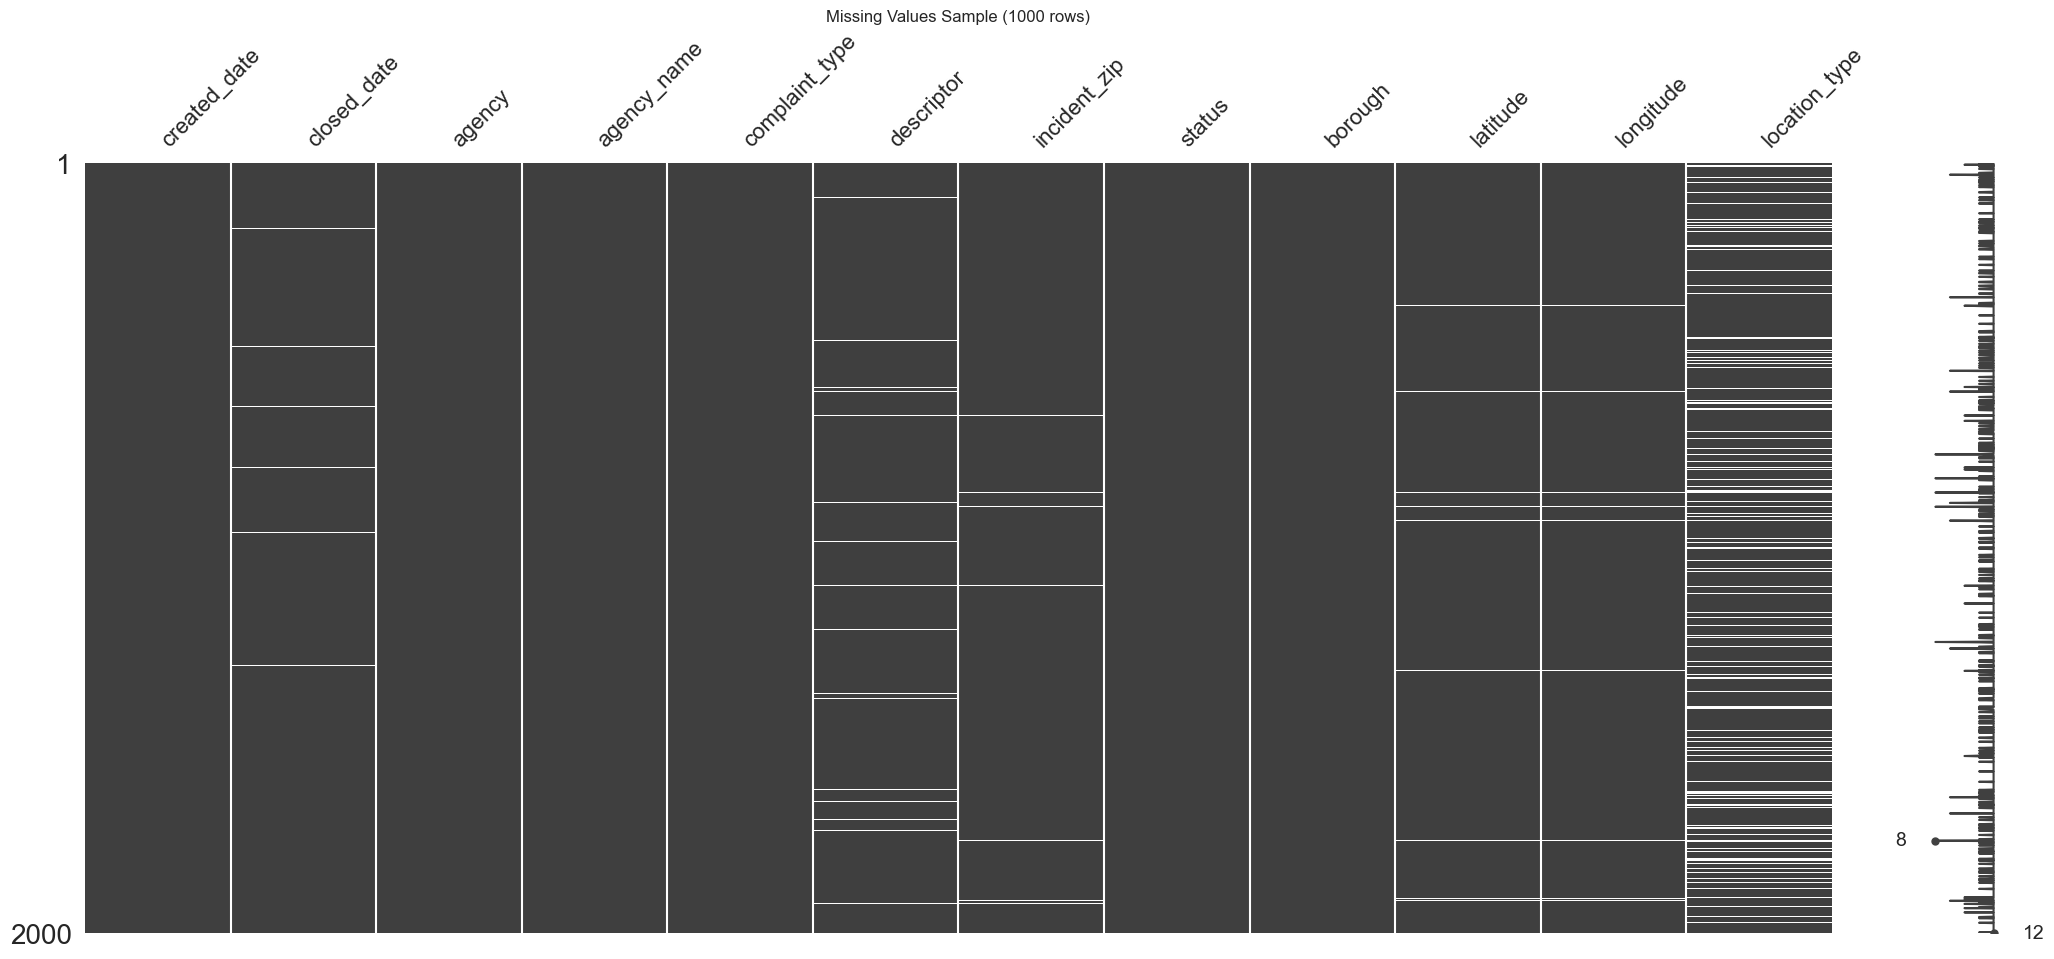

In [13]:
msno.matrix(df_cleaned.sample(2000))
plt.title("Missing Values Sample (1000 rows)")
plt.show()

In [14]:
cleaned_df.head()

,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,status,borough,latitude,longitude,location_type
0,2022-01-01T00:00:00.000,2022-01-03T08:39:00.000,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",10036.0,Closed,MANHATTAN,40.756664,-73.990193,NaN
1,2022-01-01T00:00:10.000,2022-01-01T01:00:11.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,11222.0,Closed,BROOKLYN,40.723143,-73.943662,Street/Sidewalk
2,2022-01-01T00:00:57.000,2022-01-01T00:58:22.000,NYPD,New York City Police Department,Noise - Residential,Loud Talking,11214.0,Closed,BROOKLYN,40.597473,-73.988859,Residential Building/House
3,2022-01-01T00:01:04.000,2022-01-01T00:18:49.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,10025.0,Closed,MANHATTAN,40.802562,-73.964176,Street/Sidewalk
4,2022-01-01T00:01:17.000,2022-01-01T02:55:16.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10456.0,Closed,BRONX,40.829808,-73.919235,Residential Building/House


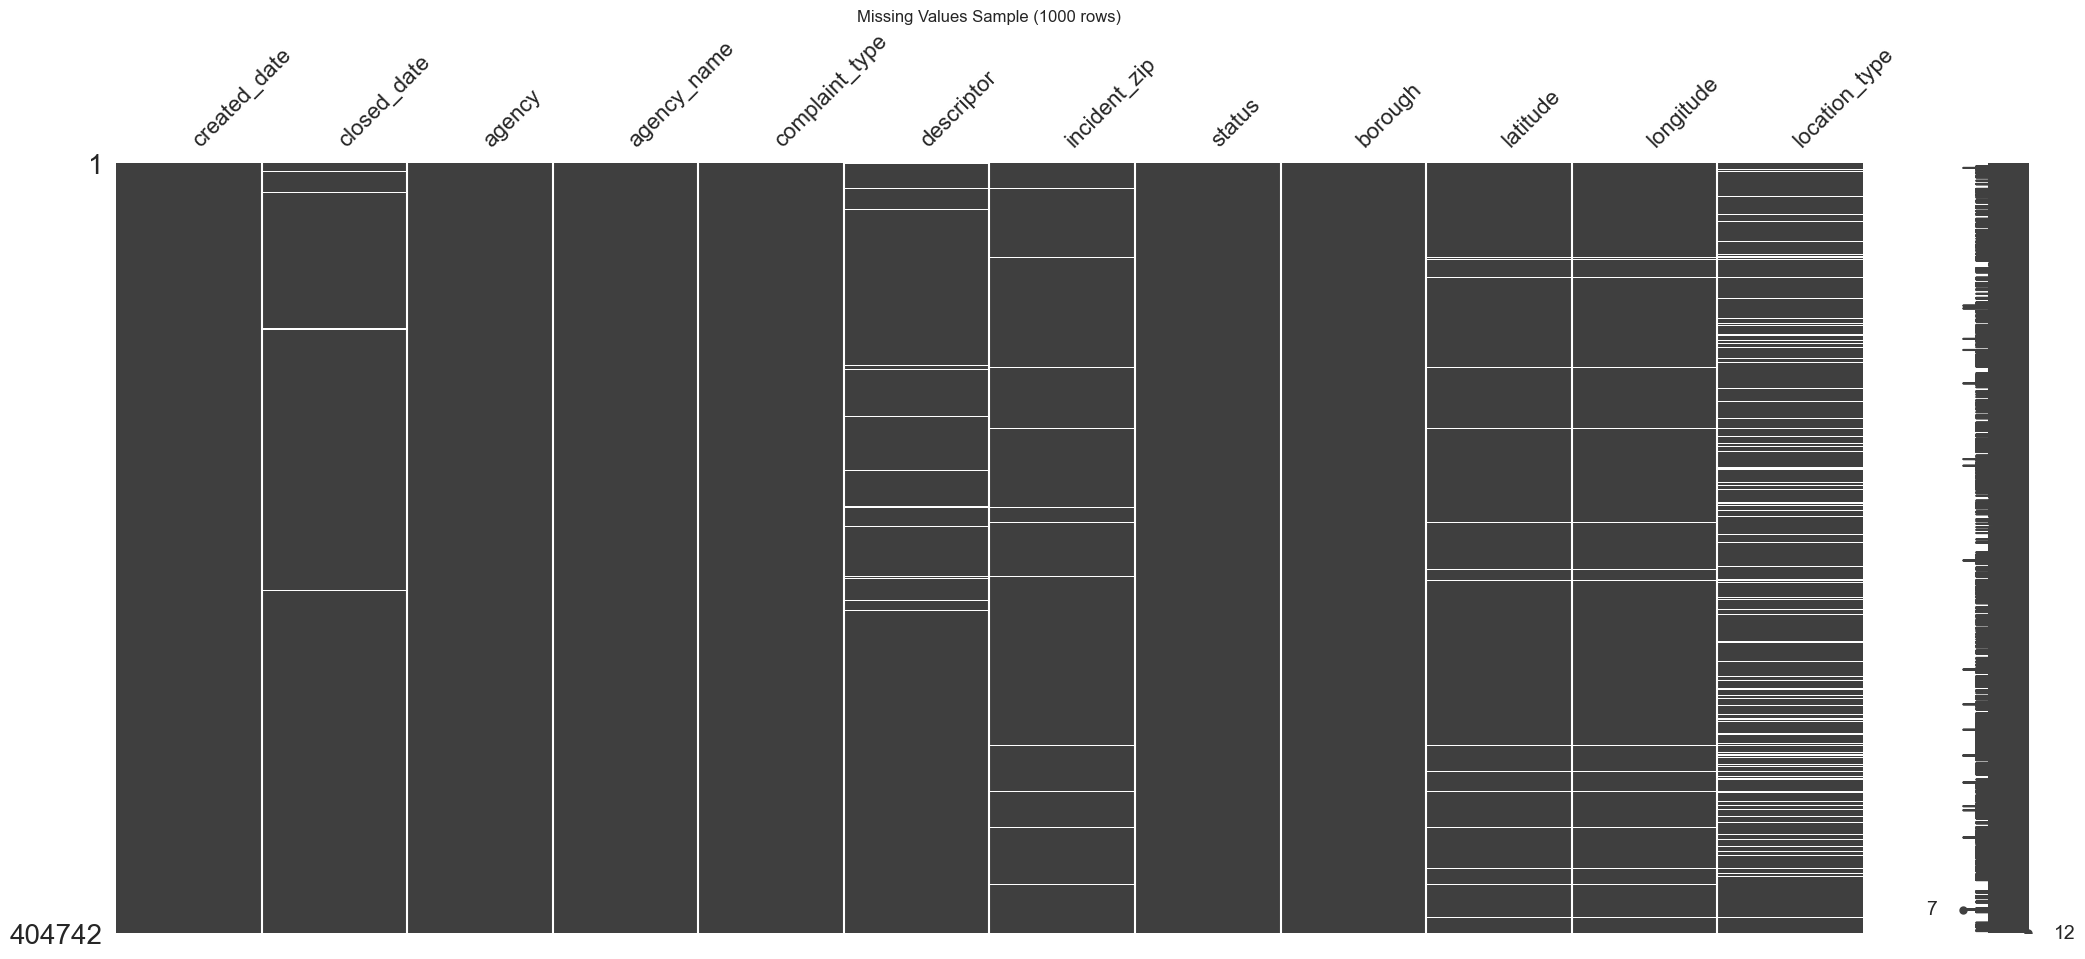

In [15]:
msno.matrix(df_cleaned)

plt.title("Missing Values Sample (1000 rows)")
plt.show()


In [16]:
cleaned_df.isna().sum()

created_date          0
closed_date           0
agency                0
agency_name           0
complaint_type        0
descriptor         9108
incident_zip       5917
status                0
borough               0
latitude           5431
longitude          5431
location_type     48088
dtype: int64

In [17]:
zip_mode = cleaned_df["incident_zip"].mode()[0]
cleaned_df.loc[:, "incident_zip"] = cleaned_df["incident_zip"].fillna(zip_mode)

In [18]:
cleaned_df.loc[:, "descriptor"] = (
    cleaned_df.groupby("complaint_type")["descriptor"]
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Missing"))
)

In [19]:
cleaned_df = cleaned_df[cleaned_df["latitude"].notna()]


In [20]:
cleaned_df.isna().sum()

created_date          0
closed_date           0
agency                0
agency_name           0
complaint_type        0
descriptor            0
incident_zip          0
status                0
borough               0
latitude              0
longitude             0
location_type     45226
dtype: int64

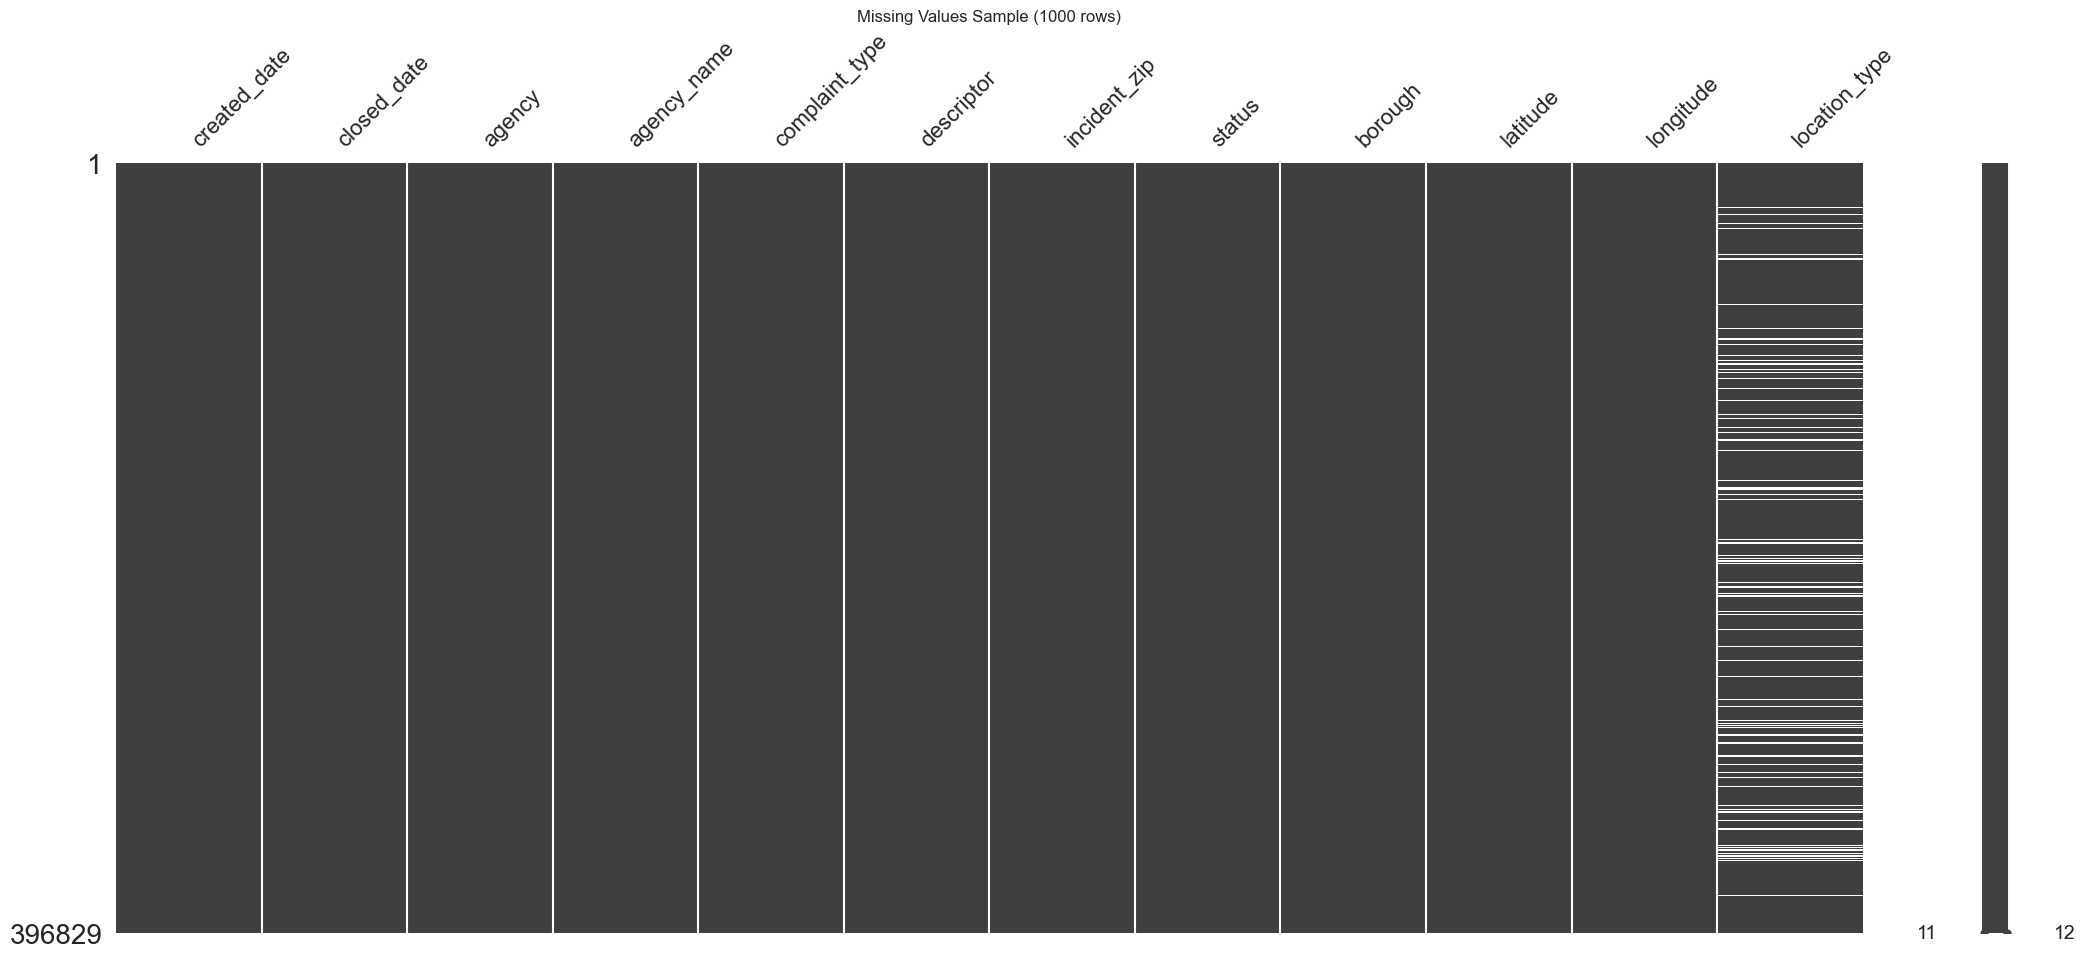

In [21]:
msno.matrix(cleaned_df)

plt.title("Missing Values Sample (1000 rows)")
plt.show()

In [22]:
cleaned_df["location_type"].isna().mean()


np.float64(0.1139684851661547)

In [23]:
cleaned_df.loc[:, "location_type"] = cleaned_df["location_type"].fillna("Missing")


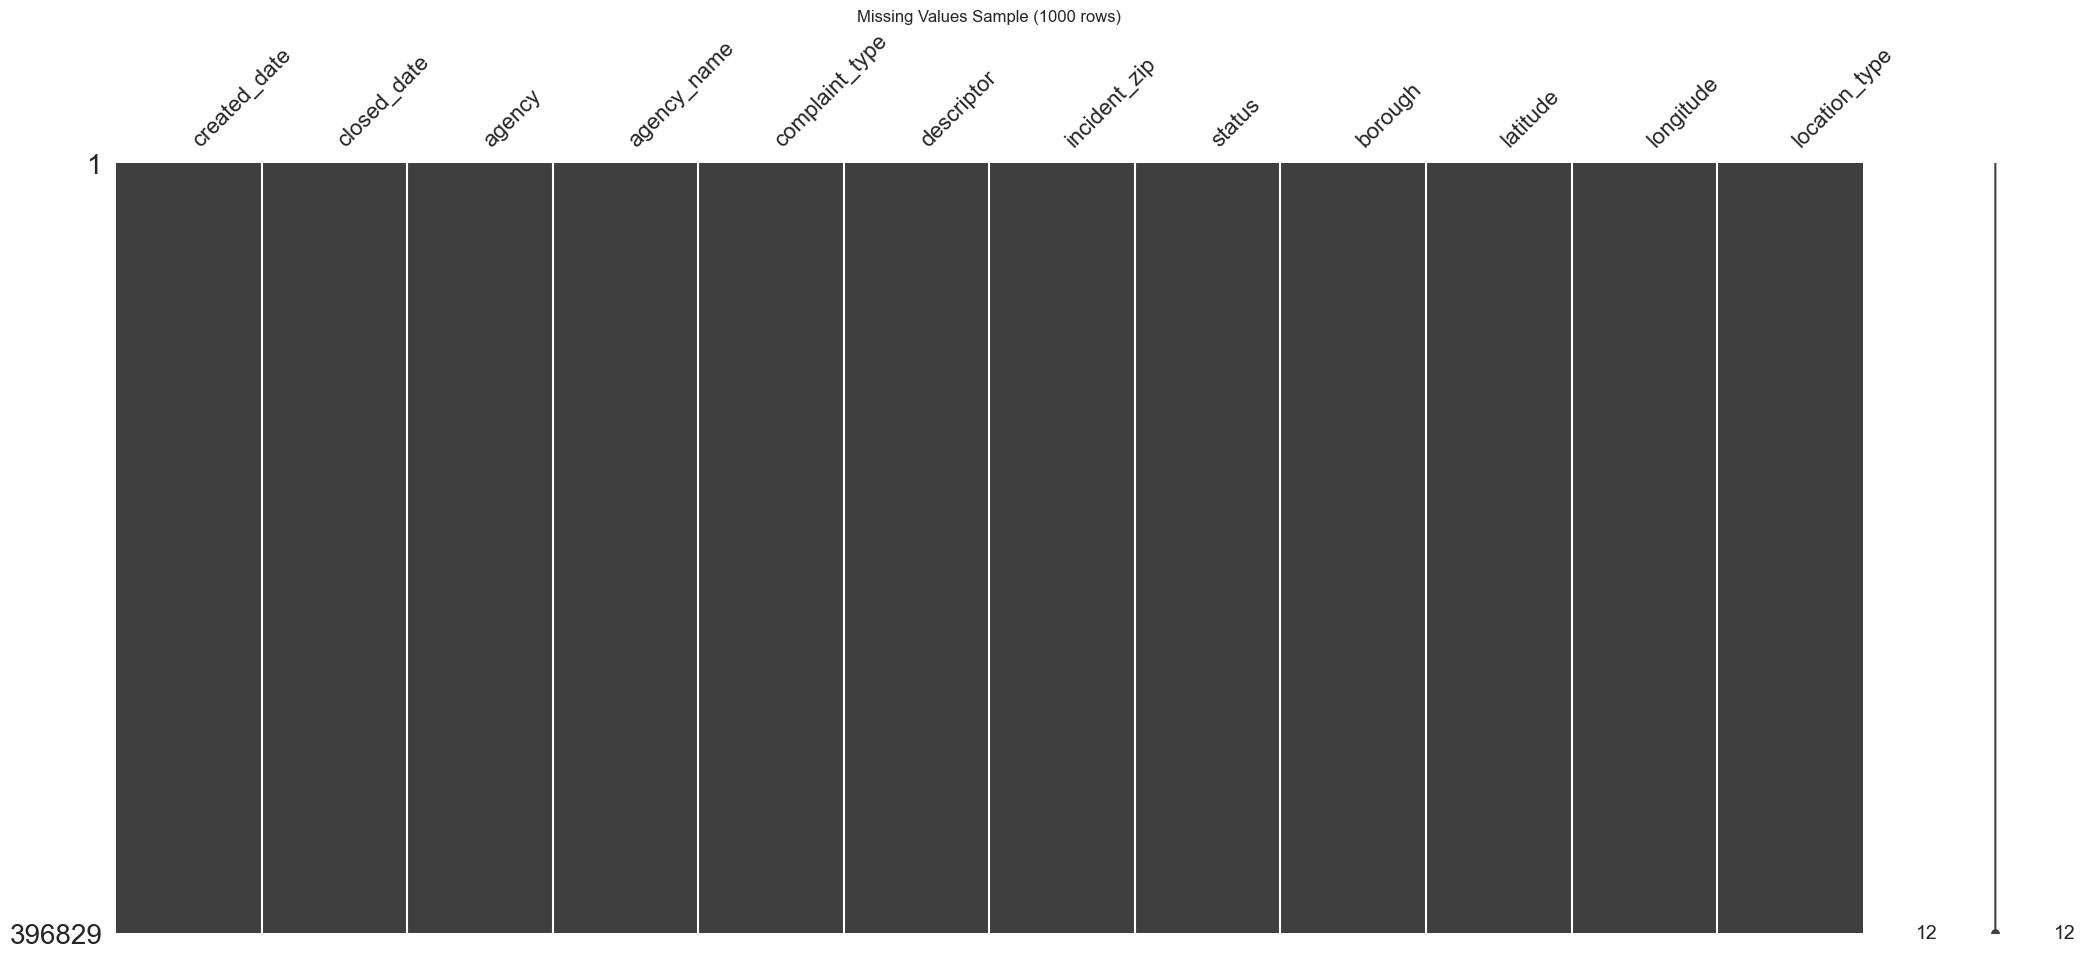

In [24]:
msno.matrix(cleaned_df)

plt.title("Missing Values Sample (1000 rows)")
plt.show()

In [25]:
#Computing the target variable using created_date and  closed date

cleaned_df["created_date"]= pd.to_datetime(cleaned_df["created_date"], errors="coerce")
cleaned_df["closed_date"]= pd.to_datetime(cleaned_df["closed_date"],errors="coerce")


cleaned_df["resolution_time_hrs"] = (
    (cleaned_df["closed_date"] - cleaned_df["created_date"]).dt.total_seconds() / 3600
)

In [26]:
(cleaned_df.loc[:, "resolution_time_hrs"] < 0).sum()

np.int64(1141)

In [27]:
cleaned_df = cleaned_df[cleaned_df["resolution_time_hrs"] >= 0]


In [28]:
cleaned_df["resolution_time_hrs"].describe()

count    395688.000000
mean        637.473519
std        2990.064070
min           0.000000
25%           1.181111
50%          31.898472
75%         126.889375
max       30189.862778
Name: resolution_time_hrs, dtype: float64

<Axes: >

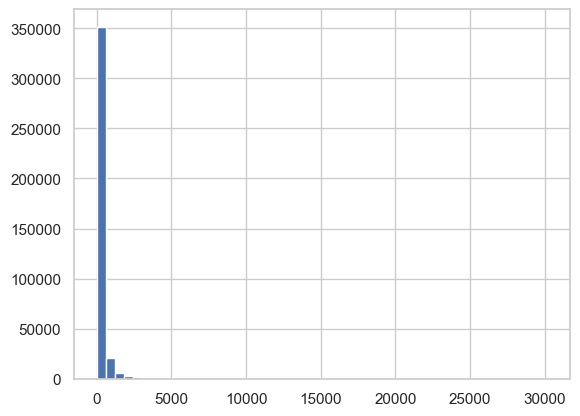

In [29]:
cleaned_df["resolution_time_hrs"].hist(bins=50)

In [30]:
import numpy as np

# Only apply log1p to non-negative values
cleaned_df.loc[:,"log_resolution_time_hrs"] = np.log1p(cleaned_df.loc[:,"resolution_time_hrs"])


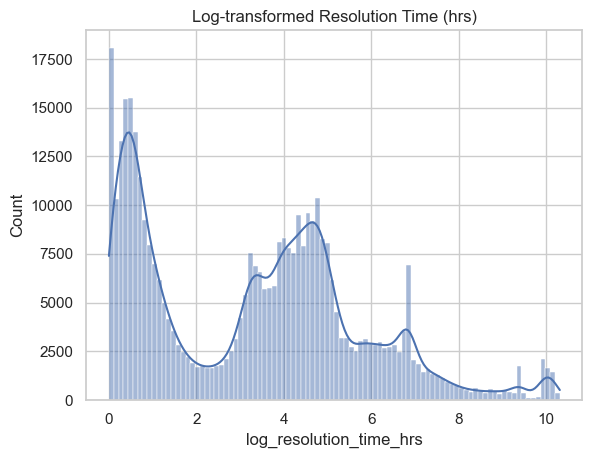

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(cleaned_df["log_resolution_time_hrs"], kde=True)
plt.title("Log-transformed Resolution Time (hrs)")
plt.show()

/var/folders/4q/ysnwys051tg_8c89c9cz1p6h0000gq/T/ipykernel_85079/2872404349.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


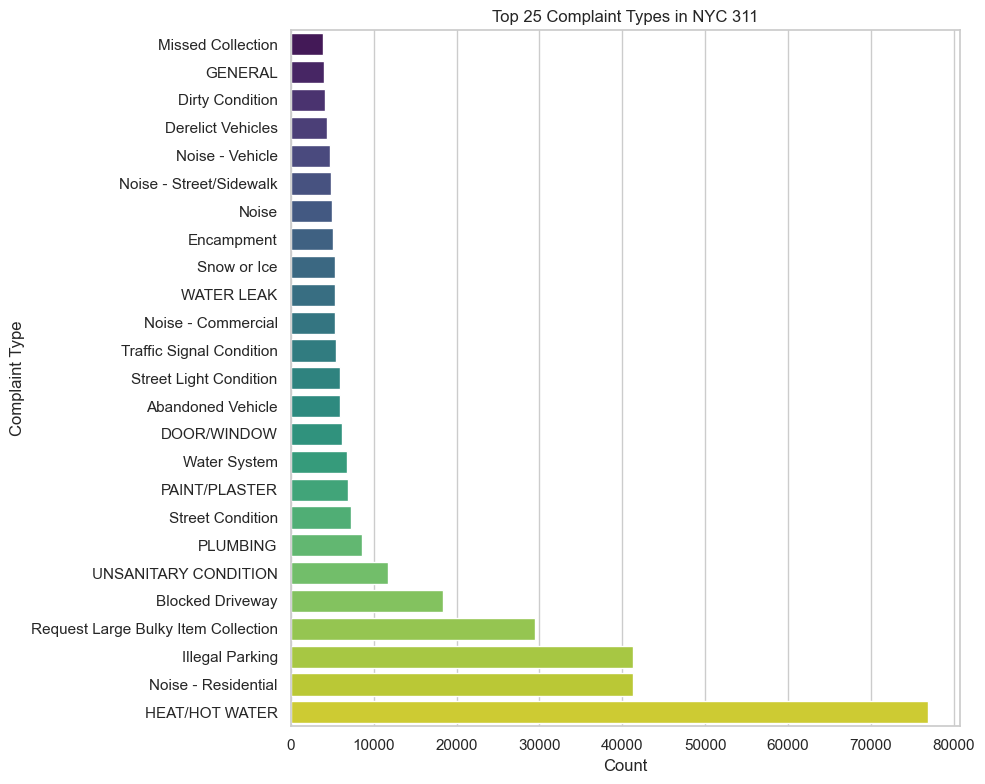

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Count top 20 complaint types
top_20_complaints = (
    cleaned_df["complaint_type"]
    .value_counts()
    .head(25)
    .sort_values(ascending=True)
)

# Plot
sns.barplot(
    x=top_20_complaints.values,
    y=top_20_complaints.index,
    palette="viridis"
)

plt.title("Top 25 Complaint Types in NYC 311")
plt.xlabel("Count")
plt.ylabel("Complaint Type")
plt.tight_layout()
plt.show()


In [33]:
complaint_counts = cleaned_df["complaint_type"].value_counts()
print(complaint_counts.head(30))  # Top 30 most common types


complaint_type
HEAT/HOT WATER                         76939
Noise - Residential                    41340
Illegal Parking                        41233
Request Large Bulky Item Collection    29406
Blocked Driveway                       18363
UNSANITARY CONDITION                   11732
PLUMBING                                8619
Street Condition                        7281
PAINT/PLASTER                           6881
Water System                            6738
DOOR/WINDOW                             6203
Abandoned Vehicle                       5912
Street Light Condition                  5888
Traffic Signal Condition                5466
Noise - Commercial                      5354
WATER LEAK                              5333
Snow or Ice                             5320
Encampment                              5081
Noise                                   5010
Noise - Street/Sidewalk                 4830
Noise - Vehicle                         4736
Derelict Vehicles                       

In [34]:
mapping = {
    # Noise-related
    "Noise - Residential": "Noise",
    "Noise - Commercial": "Noise",
    "Noise - Street/Sidewalk": "Noise",
    "Noise - Vehicle": "Noise",
    "Noise": "Noise",

    # Parking-related
    "Illegal Parking": "Parking",
    "Blocked Driveway": "Parking",

    # Water/Plumbing
    "Water Leak": "Plumbing",
    "Water System": "Plumbing",
    "PAINT/PLASTER": "Plumbing",
    "PLUMBING": "Plumbing",

    # Heat and Hot Water
    "HEAT/HOT WATER": "Heat/Water",

    # General Sanitation
    "UNSANITARY CONDITION": "Sanitation",
    "Dirty Condition": "Sanitation",

    # Street/Traffic
    "Street Condition": "Street",
    "Traffic Signal Condition": "Street",
    "Street Light Condition": "Street",
    "Derelict Vehicles": "Street",
    "Abandoned Vehicle": "Street",

    # Misc
    "Missed Collection": "Sanitation",
    "Encampment": "Public Safety",
    "DOOR/WINDOW": "Maintenance",
    "Snow or Ice": "Weather",
    "General": "Other"
}

cleaned_df["complaint_grouped"] = (
    cleaned_df["complaint_type"]
    .map(mapping)
    .fillna("Other")
)



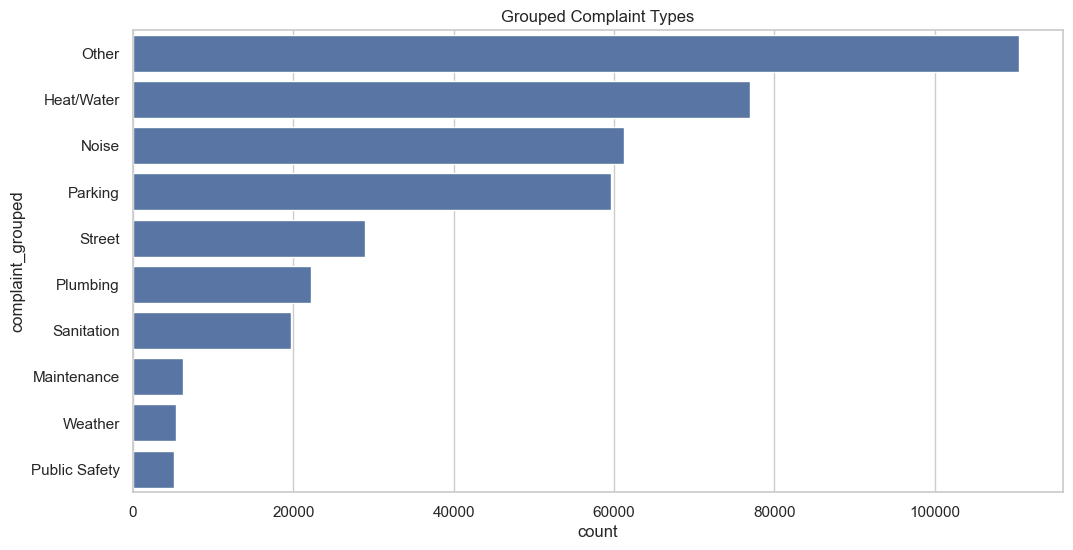

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=cleaned_df, y="complaint_grouped", order=cleaned_df["complaint_grouped"].value_counts().index)
plt.title("Grouped Complaint Types")
plt.show()


borough
BROOKLYN         118903
BRONX             94537
QUEENS            85713
MANHATTAN         79815
STATEN ISLAND     16695
Unspecified          25
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='borough'>

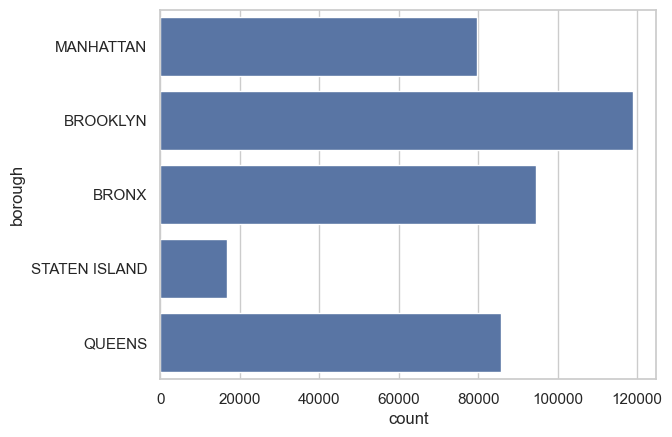

In [36]:
import seaborn as sns



print(cleaned_df["borough"].value_counts())
cleaned_df=cleaned_df[cleaned_df["borough"]!="Unspecified"]
sns.countplot(cleaned_df["borough"])


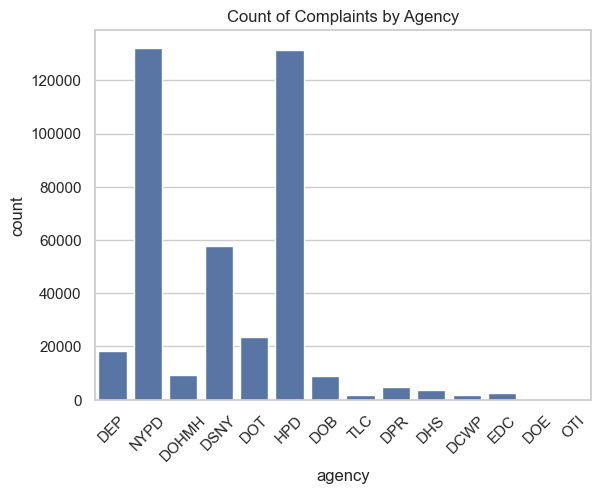

agency
NYPD     132248
HPD      131417
DSNY      57679
DOT       23408
DEP       18185
DOHMH      9379
DOB        8951
DPR        4799
DHS        3457
EDC        2409
DCWP       1824
TLC        1645
DOE         253
OTI           9
Name: count, dtype: int64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="agency", data=cleaned_df)
plt.xticks(rotation=45)
plt.title("Count of Complaints by Agency")
plt.show()

cleaned_df["agency"].value_counts()

In [ ]:
# Threshold: Keep agencies with at least 5000 complaints
threshold = 7000
agency_counts = cleaned_df["agency"].value_counts()
agencies_to_keep = agency_counts[agency_counts >= threshold].index

# Replace low-frequency agencies with 'Other'
cleaned_df["agency"] = cleaned_df["agency"].apply(lambda x: x if x in agencies_to_keep else "Other")


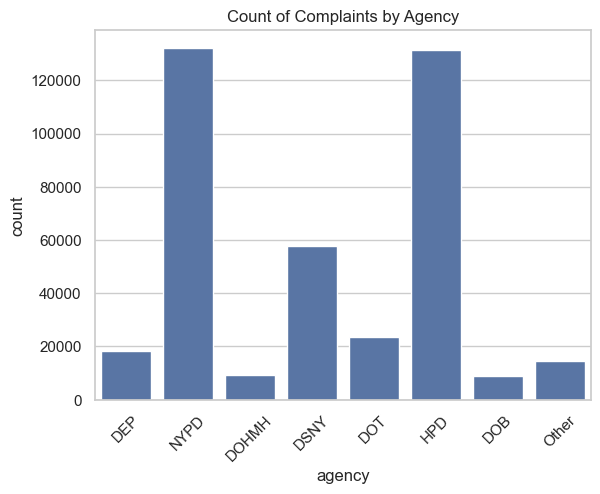

agency
NYPD     132248
HPD      131417
DSNY      57679
DOT       23408
DEP       18185
Other     14396
DOHMH      9379
DOB        8951
Name: count, dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="agency", data=cleaned_df)
plt.xticks(rotation=45)
plt.title("Count of Complaints by Agency")
plt.show()

cleaned_df["agency"].value_counts()

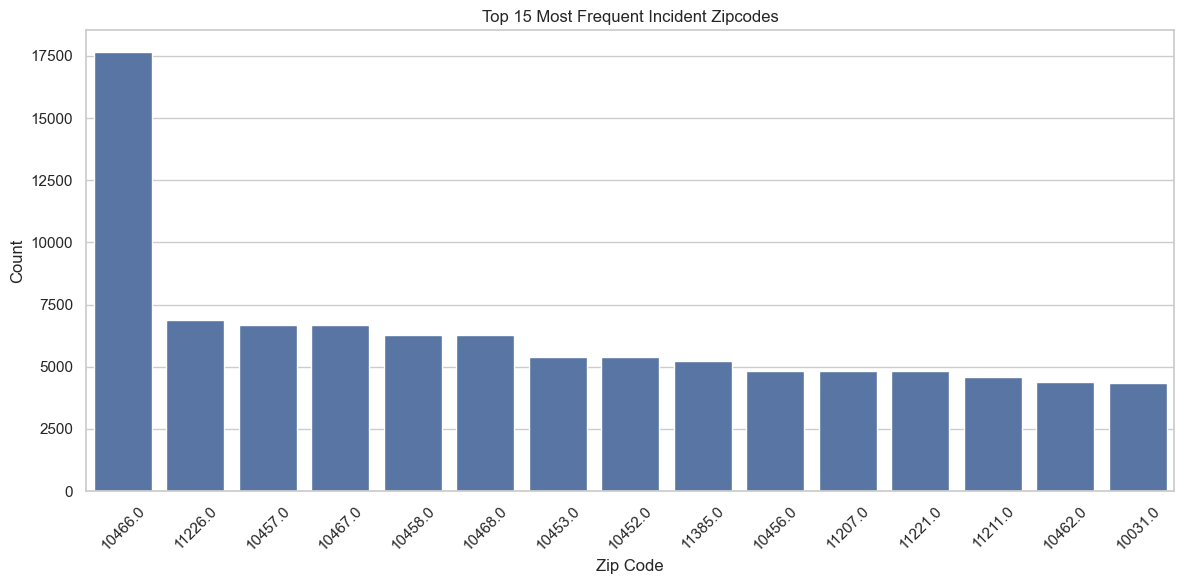

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 15 most common ZIP codes
top_zips = cleaned_df["incident_zip"].value_counts().nlargest(15).index

# Filter for those
filtered_df = cleaned_df[cleaned_df["incident_zip"].isin(top_zips)]

plt.figure(figsize=(12, 6))
sns.countplot(x="incident_zip", data=filtered_df, order=top_zips)
plt.xticks(rotation=45)
plt.title("Top 15 Most Frequent Incident Zipcodes")
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [41]:
top_types = cleaned_df["location_type"].value_counts().loc[lambda x: x >= 1000].index


cleaned_df["location_type_grouped"] = cleaned_df["location_type"].apply(
    lambda x: x if x in top_types else "Other"
)





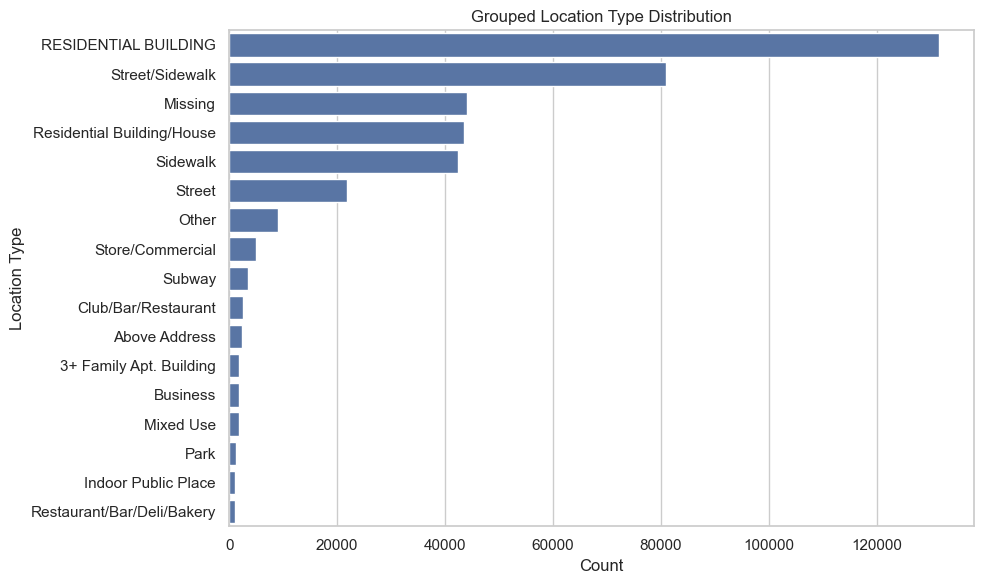

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(y="location_type_grouped", data=cleaned_df,
              order=cleaned_df["location_type_grouped"].value_counts().index)
plt.title("Grouped Location Type Distribution")
plt.xlabel("Count")
plt.ylabel("Location Type")
plt.tight_layout()
plt.show()


In [43]:
cleaned_df['created_date'] = pd.to_datetime(cleaned_df['created_date'])
cleaned_df['year'] = cleaned_df['created_date'].dt.year
cleaned_df['month'] = cleaned_df['created_date'].dt.month
cleaned_df['year_month'] = cleaned_df['created_date'].dt.to_period('M')



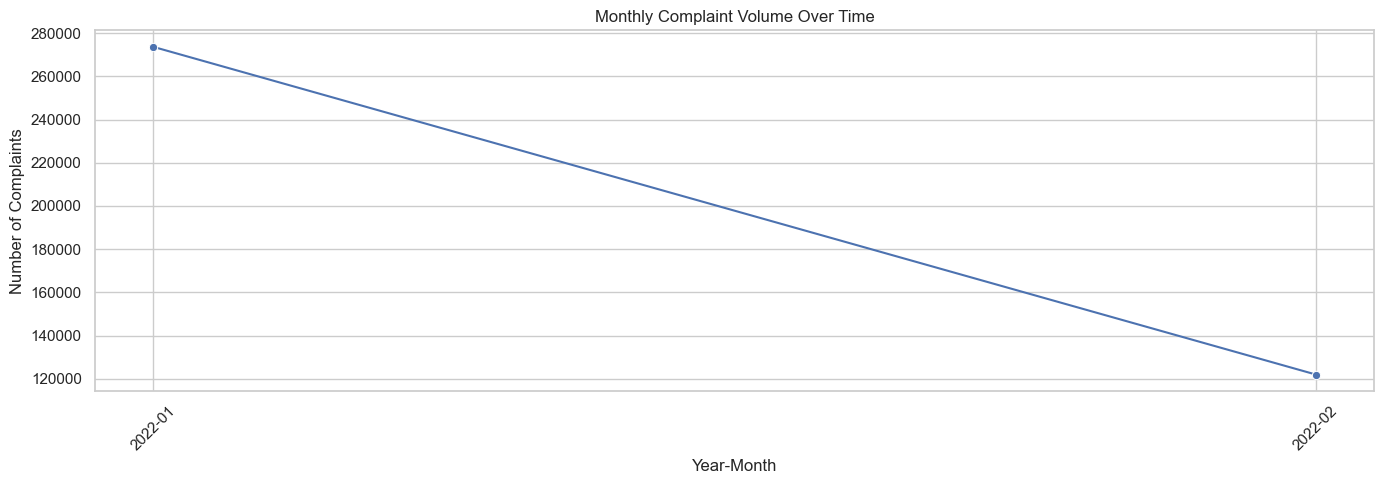

In [44]:
monthly_trend = cleaned_df['year_month'].value_counts().sort_index()

plt.figure(figsize=(14,5))
sns.lineplot(x=monthly_trend.index.astype(str), y=monthly_trend.values, marker='o')
plt.title("Monthly Complaint Volume Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



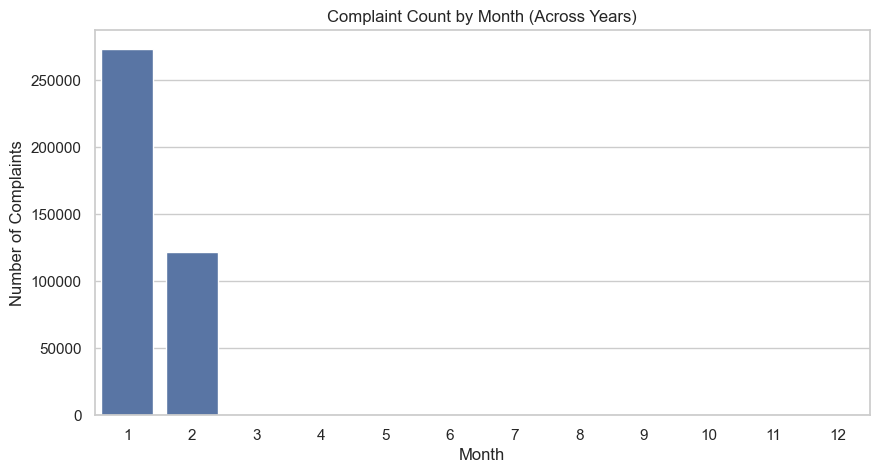

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data=cleaned_df, x='month', order=range(1,13))
plt.title("Complaint Count by Month (Across Years)")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.show()


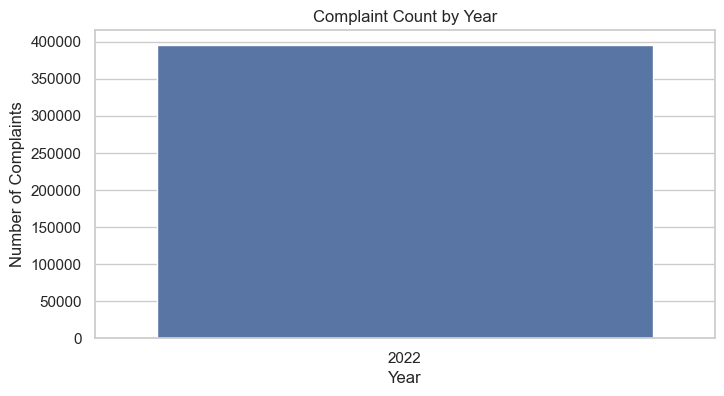

In [53]:
cleaned_df['created_date'].dt.year.value_counts()

plt.figure(figsize=(8,4))
sns.countplot(data=cleaned_df, x='year')
plt.title("Complaint Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.show()




Missing dates: 0


## Bivariate Analysis


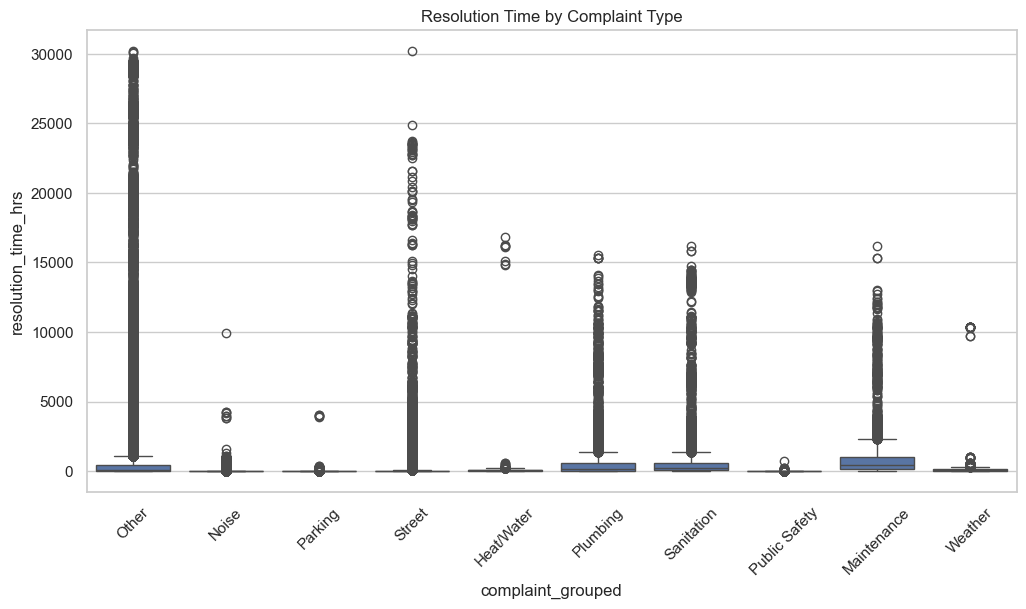

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="complaint_grouped", y="resolution_time_hrs", data=cleaned_df)
plt.xticks(rotation=45)
plt.title("Resolution Time by Complaint Type")
plt.show()


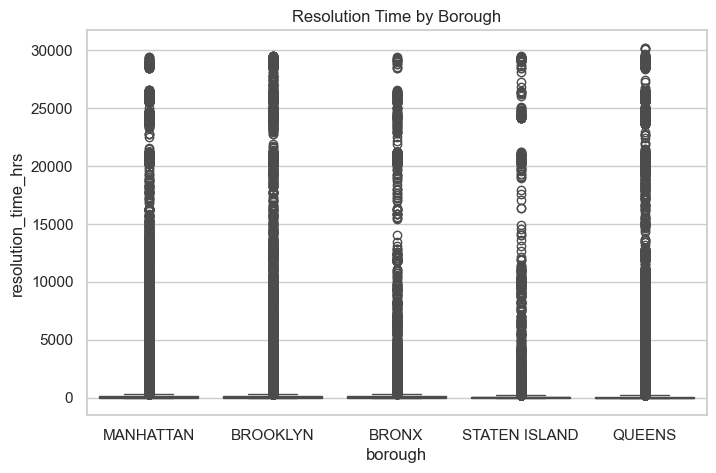

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="borough", y="resolution_time_hrs", data=cleaned_df)
plt.title("Resolution Time by Borough")
plt.show()


In [57]:
# Step 1: Count frequency of each agency
agency_counts = cleaned_df['agency'].value_counts()

# Step 2: Define threshold (e.g., keep top 7, rest as "Other")
top_agencies = agency_counts[agency_counts > 10000].index  # adjust threshold if needed

# Step 3: Create a new column
cleaned_df['agency_grouped'] = cleaned_df['agency'].apply(lambda x: x if x in top_agencies else 'Other')



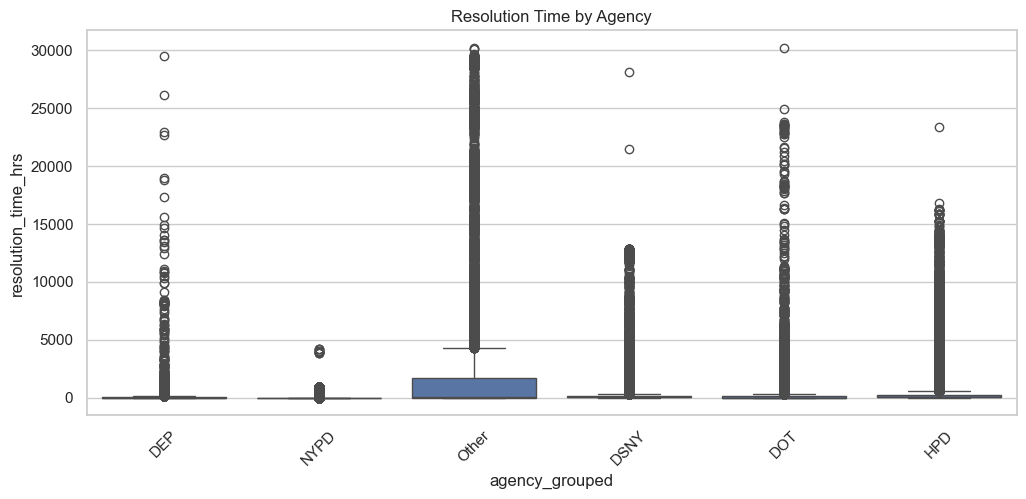

In [58]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="agency_grouped", y="resolution_time_hrs", data=cleaned_df)
plt.xticks(rotation=45)
plt.title("Resolution Time by Agency")
plt.show()
